In [2]:
import pandas as pd
import numpy as np

ts = np.load("data/timeseries.npy")
ts.shape

(3320, 30)

## Time Series Plots

We plot the mean and median views across time. 

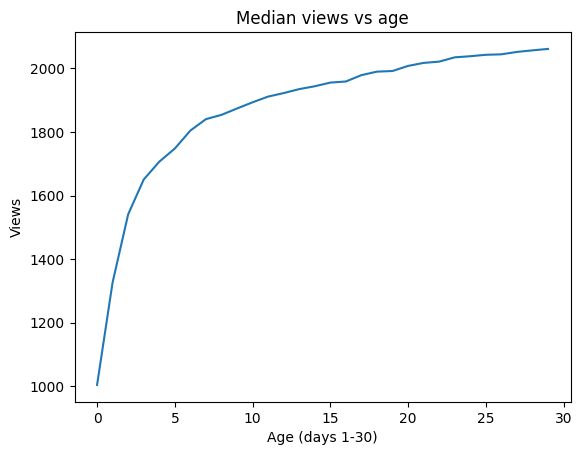

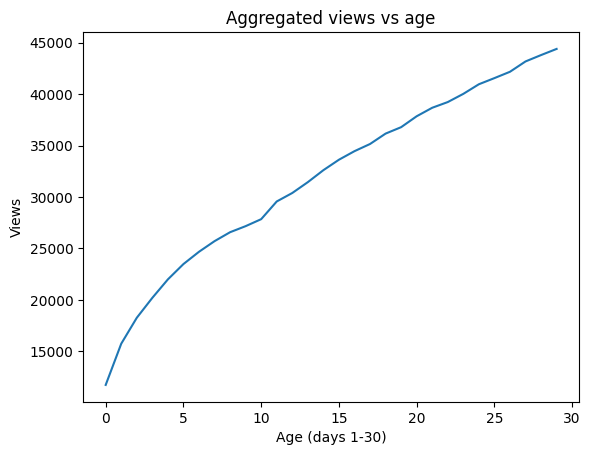

In [4]:
from matplotlib import pyplot as plt

ts_mean = np.mean(ts, axis=0)
ts_median = np.median(ts, axis=0)

plt.clf()
plt.plot(ts_median)
plt.title("Median views vs age")
plt.xlabel("Age (days 1-30)")
plt.ylabel("Views")
plt.show()

plt.clf()
plt.plot(ts_mean)
plt.title("Aggregated views vs age")
plt.xlabel("Age (days 1-30)")
plt.ylabel("Views")
plt.show()

## Clustering Analysis

Load in standardised data 

In [7]:
ts_std = np.load("data/timeseries_std.npy")
ts_std.shape

np.float64(-3.5179300000977216)

Plot the timeseries, aggregated line and calculate fitted line using logarithmic regression.

/var/folders/p6/8cdyrdjx0bb9nc27_9f01gpw0000gn/T/ipykernel_23183/3645016135.py:9: RuntimeWarning: invalid value encountered in log
  return a * np.log(x + b) + c


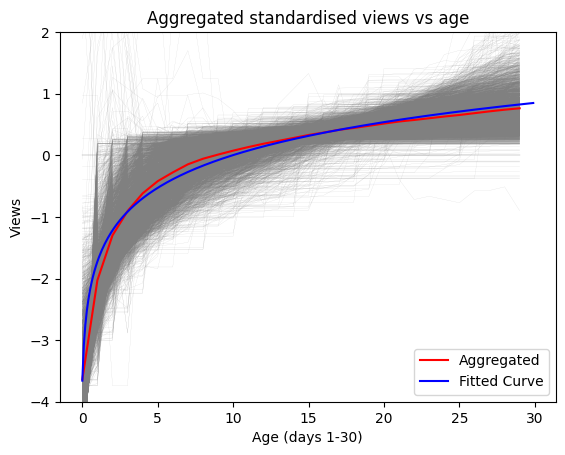

In [80]:
ts_std_mean = np.mean(ts_std, axis=0)
ts_arr_flattened = ts_std.flatten()
time = np.arange(30)

from scipy.optimize import curve_fit

#logarithmic function
def func(x, a, b, c):
    return a * np.log(x + b) + c

x = np.arange(len(ts_std_mean))
popt, pcov = curve_fit(func, x, ts_std_mean)

x_fine = np.arange(len(ts_std_mean), step = 0.1)

plt.clf()
plt.plot(time, ts_std.T, linewidth=0.1, color="gray", alpha=0.5)
plt.plot(ts_std_mean, 'r-', label = "Aggregated")
plt.plot(x_fine, func(x_fine, *popt), 'b-', label = "Fitted Curve")
plt.title("Aggregated standardised views vs age")
plt.legend()
plt.xlabel("Age (days 1-30)")
plt.ylabel("Views")
plt.ylim(-4, 2)
plt.show()

Calculate mean squared error for each time series.

In [90]:
mse_arr = []

for n in ts_std:
    error = []
    for i, y in enumerate(n):
        error.append((y - ts_std_mean[i])**2)
    mse = np.sum(error) / len(ts_std_mean)
    mse_arr.append(mse)

len(mse_arr)
mse_arr = np.array(mse_arr)

Clustering based on mean squared error of the aggregated line.

306 683 2331
[ 312.5  467.   491.   501.   491.   504.5  505.5  519.5  525.5  564.5
  618.5  651.5  652.   652.5  686.   729.   810.   821.5  838.   861.5
  930.   965.5  983.   983.  1005.  1005.  1031.  1031.5 1031.5 1031.5]


<Figure size 640x480 with 0 Axes>

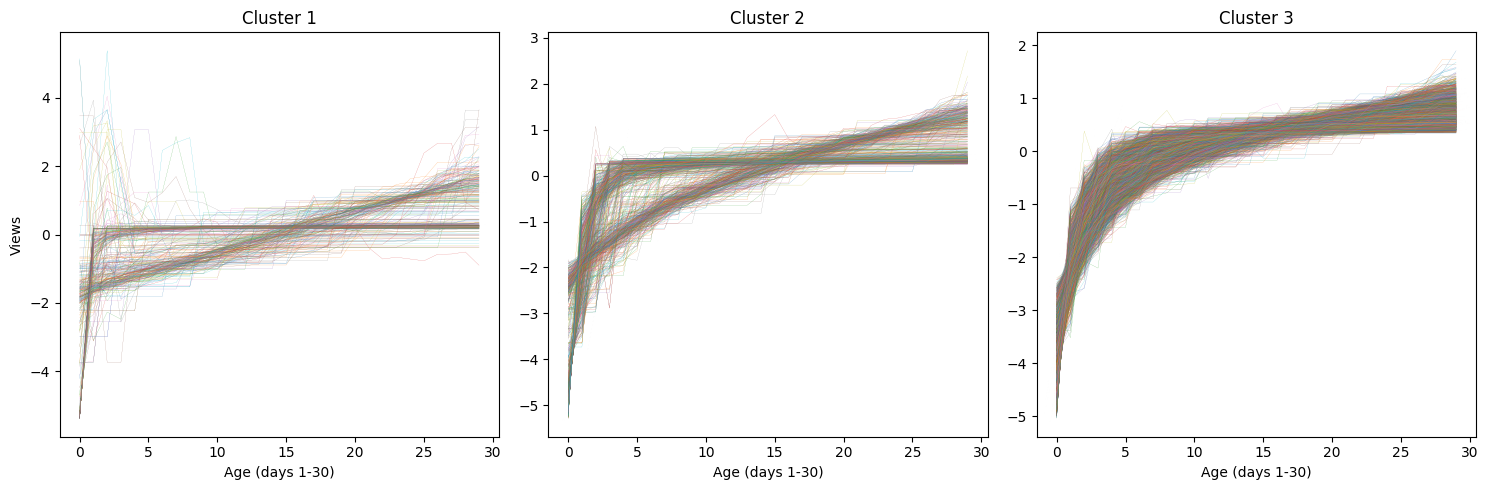

In [125]:
clusters_indices = [
    np.flatnonzero(mse_arr > 0.3),
    np.flatnonzero((mse_arr > 0.15) & (mse_arr <= 0.3)),
    np.flatnonzero((mse_arr > 0) & (mse_arr <= 0.15))
]

print(len(clusters_indices[0]), len(clusters_indices[1]), len(clusters_indices[2]))

clusters = [
    ts_std[clusters_indices[0]],
    ts_std[clusters_indices[1]],
    ts_std[clusters_indices[2]]
]

print(np.median(ts[clusters_indices[0]], axis = 0))

plt.clf()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].plot(clusters[0].T, linewidth=0.1)
axes[0].set_title("Cluster 1")
axes[0].set_xlabel("Age (days 1-30)")
axes[0].set_ylabel("Views")

axes[1].plot(clusters[1].T, linewidth=0.1)
axes[1].set_title("Cluster 2")
axes[1].set_xlabel("Age (days 1-30)")

axes[2].plot(clusters[2].T, linewidth=0.1)
axes[2].set_title("Cluster 3")
axes[2].set_xlabel("Age (days 1-30)")

plt.tight_layout()
plt.show()